# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

В финальном проекте модуля вы можете пользоваться подсказками в ноутбуке (они менее подробные, чем были в предыдущих уроках), обращаться за помощью к экспертам в Discord и смотреть разборы в LMS (за просмотр разбора снимается половина баллов за задание).

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеки `pandas` и `os`.  
      
2) По аналогии с кодом, который вы использовали для сбора данных в 7-м уроке про грязные данные, сделайте следующее:  
a. создайте путь к папке `data`, используя ваш логин;  
b. соберите названия нужных вам файлов (`orders.csv`, `order_status.csv`, `products.csv`) в список `target_files`;  
c. создайте пустой список `data_files`, куда будете сохранять пути к файлам;  
d. с помощью функции `os.walk()` создайте генератор;  
e. с помощью цикла пройдитесь по генератору и, если название файла совпадает с нужным вам из списка `target_files`, путь к этому файлу добавьте в список `data_files`.
      
3) Используя пути к файлам из списка `data_files`, соберите полные датафреймы `df_orders`, `df_order_status` и `df_products`:  
a. создайте пустые списки `orders_df_list`, `order_status_df_list` и `products_df_list`, чтобы в них сложить данные для соответствующих датафреймов;  
b. с помощью цикла пройдитесь по путям в списке `data_files` и прочитайте датафрейм по этому пути. Добавьте датафрейм в тот или иной список в зависимости от того, название какого датасета содержит путь. Если в названии пути есть `orders.csv`, перед добавлением в список создайте колонки `manager` с именами менеджеров и `date` с датами. А если в названии пути есть `products.csv`, перед добавлением в список создайте колонку `category` с категориями товаров. Для создания колонок используйте подстроки из строки с путем.  
      
4) Каждый раз используя функцию `pd.concat` с параметром `ignore_index=True`, соберите данные в датафреймы: из списка `orders_df_list` в датафрейм `df_orders`, из списка `order_status_df_list` — в датафрейм `df_order_status`, а из списка `products_df_list` - в датафрейм `df_products`.
      
5) Проверьте размер каждого датафрейма и убедитесь, что:
- `df_orders` имеет размер (4603, 5)
- `df_order_status` — (346, 3)
- `df_products` — (1677, 4)
      
6) Сохраните каждый датафрейм в соответствующий csv файл, задав его название как строку и параметр `index=False`.
      
7) По одному скачайте получившиеся csv файлы из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код.

      
</p>
</details>

In [1]:
# Ваш код здесь

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [3]:
# 2) По аналогии с кодом, который вы использовали для сбора данных в 7-м уроке про грязные данные, сделайте следующее:
# a. создайте путь к папке data, используя ваш логин;
# b. соберите названия нужных вам файлов (orders.csv, order_status.csv, products.csv) в список target_files;
# c. создайте пустой список data_files, куда будете сохранять пути к файлам;
# d. с помощью функции os.walk() создайте генератор;
# e. с помощью цикла пройдитесь по генератору и, если название файла совпадает с нужным вам из списка target_files, 
#путь к этому файлу добавьте в список data_files.

In [4]:
data_way = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-alena-pahomova-jae-2f212/shared/homeworks/python_ds_miniprojects/final_project/data/'

In [5]:
target_files =  ['orders.csv', 'order_status.csv', 'products.csv']
data_files = []

In [6]:
for path, dirs, files in os.walk(data_way):
#     if len(files) > 0:
      for file in files:
         if file in target_files:
            file_path = os.path.join(path, file)
            data_files.append(file_path)

data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-alena-pahomova-jae-2f212/shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-alena-pahomova-jae-2f212/shared/homeworks/python_ds_miniprojects/final_project/data/products/Настенная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-alena-pahomova-jae-2f212/shared/homeworks/python_ds_miniprojects/final_project/data/products/Система караоке/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-alena-pahomova-jae-2f212/shared/homeworks/python_ds_miniprojects/final_project/data/products/Напольная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-alena-pahomova-jae-2f212/shared/homeworks/python_ds_miniprojects/final_project/data/products/Полочная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-alena-pahomova-jae-2f212/shared/homeworks/python_ds_miniprojects/final_project/data/products/Са

In [7]:
# 3) Используя пути к файлам из списка data_files, соберите полные датафреймы df_orders, df_order_status и df_products:
# a. создайте пустые списки orders_df_list, order_status_df_list и products_df_list, чтобы в них сложить данные для 
# соответствующих датафреймов;
# b. с помощью цикла пройдитесь по путям в списке data_files и прочитайте датафрейм по этому пути. Добавьте датафрейм в 
# тот или иной список в зависимости от того, название какого датасета содержит путь. Если в названии пути есть orders.csv, 
# перед добавлением в список создайте колонки manager с именами менеджеров и date с датами. А если в названии пути есть 
# products.csv, перед добавлением в список создайте колонку category с категориями товаров. Для создания колонок используйте 
# подстроки из строки с путем.

In [8]:
orders_df_list = []
order_status_df_list = []
products_df_list = []
df_orders = pd.DataFrame()
df_order_status = pd.DataFrame()
df_products = pd.DataFrame()

In [9]:
target_files

['orders.csv', 'order_status.csv', 'products.csv']

In [10]:
for file_path in data_files:
    if file_path.endswith(target_files[2]):
        products = pd.read_csv(file_path)
        products['category'] = file_path.split('/')[-2]
#         products_df_list.append(products)
        df_products = pd.concat([df_products, products], ignore_index=True)
    
    if file_path.endswith(target_files[1]):
        orders_status = pd.read_csv(file_path)
#         order_status_df_list.append(pd.read_csv(file_path))
        df_order_status = pd.concat([df_order_status, orders_status], ignore_index=True)
        
    if file_path.endswith(target_files[0]):
        orders = pd.read_csv(file_path)
        orders['manager'] = file_path.split('/')[-2]
        orders['date'] = file_path.split('/')[-3]
#         orders_df_list.append(orders)
        df_orders = pd.concat([df_orders, orders], ignore_index=True)

In [11]:
# 5) Проверьте размер каждого датафрейма и убедитесь, что:

# df_orders имеет размер (4603, 5)
# df_order_status — (346, 3)
# df_products — (1677, 4)

In [12]:
df_orders.shape

(4603, 5)

In [13]:
df_order_status.shape

(346, 3)

In [14]:
df_products.shape

(1677, 4)

In [15]:
# 4) Каждый раз используя функцию pd.concat с параметром ignore_index=True, соберите данные в датафреймы: 
#     из списка orders_df_list в датафрейм df_orders, 
#     из списка order_status_df_list — в датафрейм df_order_status, 
#     а из списка products_df_list - в датафрейм df_products.

In [16]:
# 6) Сохраните каждый датафрейм в соответствующий csv файл, задав его название как строку и параметр index=False.

In [17]:
df_orders.to_csv('df_orders', index=False)

In [18]:
df_order_status.to_csv('df_order_status', index=False)

In [19]:
df_products.to_csv('df_products', index=False)

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Переведите колонку `date` в тип `datetime`.
      
2) Сгруппируйте данные по дате и посчитайте число уникальных заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
3) Отсортируйте данные по убыванию числа заказов и возьмите дату из верхней строчки.
      
</p>
</details>

In [20]:
# Ваш код здесь
df_orders.date = pd.to_datetime(df_orders.date, yearfirst=True)
df_orders

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26


In [21]:
df_orders_by_date = df_orders.groupby('date').agg({'order_id':'count'}) \
.reset_index().rename(columns={'order_id':'orders'}) \
.sort_values(by='orders', ascending=False)

df_orders_by_date.head()

,date,orders
13,2024-03-14,437
12,2024-03-13,339
0,2024-03-01,302
28,2024-03-29,241
25,2024-03-26,231


## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеку `seaborn` и модуль `pyplot` из библиотеки `matplotlib`.
      
2) Чтобы все графики в ноутбуке имели одинаковое форматирование, можете установить общие настройки через `sns.set()`.
      
3) Постройте линейный график, где по оси `х` будут идти даты, а по оси `у` — количество заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.
      
</p>
</details>

In [22]:
sns.set(
    font_scale =1,
    style      ="whitegrid",
    rc         ={'figure.figsize':(15,5)}
)

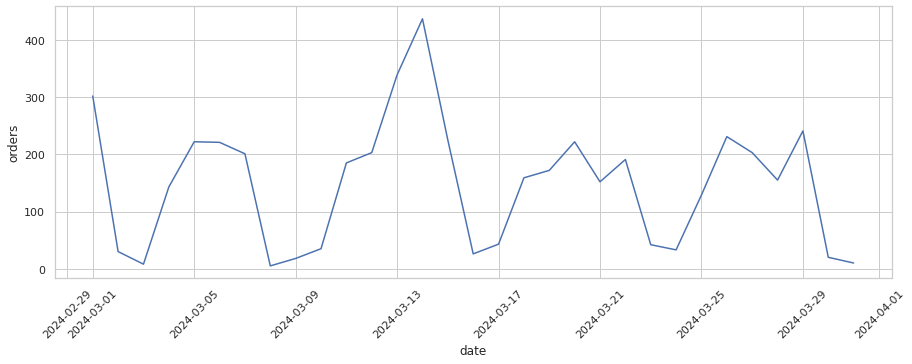

In [23]:
# Ваш код здесь

sns.lineplot(data=df_orders_by_date, x='date', y='orders').tick_params(axis='x', rotation=45)

In [24]:
df_orders_by_date.sort_values(by='date')

,date,orders
0,2024-03-01,302
1,2024-03-02,30
2,2024-03-03,8
3,2024-03-04,143
4,2024-03-05,222
5,2024-03-06,221
6,2024-03-07,201
7,2024-03-08,5
8,2024-03-09,18
9,2024-03-10,35


## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Проверьте каждый из четырех предложенных поинтов: есть ли дни, соответствующие одному или нескольким поинтам? Посмотрите на график или на значения в датафрейме с количеством заказов по дням.
      
</p>
</details>

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Объедините датафреймы `df_orders` и `df_order_status` в новый `orders_status`.
      
2) Можете вывести первые строчки нового датафрейма и посмотреть его размер, чтобы убедиться, что объединение прошло корректно.
      
3) Сохраните датафрейм в csv файл с помощью метода, задав его название как строку `orders_status.csv` и параметр `index=False`.
      
4) Скачайте получившийся csv файл из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код. 
      
</p>
</details>

In [25]:
# Ваш код здесь

orders_status = df_orders.merge(df_order_status, how='outer', on=['order_id'])
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [26]:
orders_status.to_csv('orders_status', index=False)

## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Чтобы оставить в данных только информацию о том, был заказ подтвержден или отменен, выберите из датафрейма `orders_status` колонки с номером заказа и статусом, а затем удалите дубликаты (НЕ сохраняйте результат в тот же датафрейм, потому что `orders_status` в полном виде понадобится для решения следующих заданий).

2) Посчитайте частоту, с которой встречается каждый из статусов в оставшихся данных.

3) Посчитайте долю каждого из статусов. Значения округлите до 2 знаков после точки.

      
</p>
</details>

In [27]:
# Ваш код здесь

orders_by_stat = orders_status[['order_id', 'status']]
orders_by_stat

,order_id,status
0,QPLK-54839036,confirmed
1,QPLK-54839036,confirmed
2,QPLK-54839036,confirmed
3,QPLK-54839036,confirmed
4,QPLK-54839036,confirmed
...,...,...
4598,UAKD-95751033,confirmed
4599,UAKD-95751033,confirmed
4600,UAKD-95751033,confirmed
4601,UAKD-95751033,confirmed


In [28]:
new_df = orders_by_stat.drop_duplicates().groupby('status').agg({'order_id':'count'}).reset_index()


In [29]:
new_df

,status,order_id
0,canceled,37
1,confirmed,309


In [30]:
new_df['chastota'] = new_df.order_id / (new_df.order_id[0] + new_df.order_id[1])
new_df

,status,order_id,chastota
0,canceled,37,0.106936
1,confirmed,309,0.893064


In [31]:
new_df.chastota = new_df.chastota.round(2)
new_df

,status,order_id,chastota
0,canceled,37,0.11
1,confirmed,309,0.89


## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Данные в датафрейме `orders_status` сгруппируйте по дате и статусу, посчитайте количество уникальных заказов для каждой группы. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Разверните получившийся датафрейм так, чтобы получилась сводная таблица, где в индексе — даты, в колонках — статусы, а в значениях — количество заказов. 
      
3) Пропуски заполните нулями.
      
4) Из-за того, что после разворота таблицы в колонках `canceled` и `confirmed` появились пропущенные значения, тип данных в этих колонках стал `float`. Но число заказов не может быть дробным, поэтому приведите эти колонки к типу `int`.
      
5) Отфильтруйте строки, где значение в колонке `confirmed` равно нулю.
      
</p>
</details>

In [32]:
# Ваш код здесь

df_df = orders_status.drop_duplicates(subset=['date', 'order_id']).groupby(['date', 'status']) \
.agg({'order_id':'count'}).rename(columns={'order_id':'orders'})

#reset_index().

In [33]:
df_df

orders
date       status           
2024-03-01 canceled        2
           confirmed      20
2024-03-02 confirmed       2
2024-03-03 confirmed       1
2024-03-04 confirmed      10
2024-03-05 confirmed      18
2024-03-06 canceled        1
           confirmed      13
2024-03-07 canceled        1
           confirmed      13
2024-03-08 confirmed       1
2024-03-09 canceled        1
2024-03-10 canceled        1
           confirmed       2
2024-03-11 canceled        1
           confirmed      11
2024-03-12 canceled        2
           confirmed      13
2024-03-13 canceled       19
           confirmed       5
2024-03-14 confirmed      34
2024-03-15 canceled        1
           confirmed      16
2024-03-16 confirmed       2
2024-03-17 confirmed       3
2024-03-18 confirmed      12
2024-03-19 canceled        2
           confirmed      13
2024-03-20 canceled        2
           confirmed      12
2024-03-21 canceled        2
           confirmed      11
2024-03-22 confirmed      16
2024-03-23 confirmed       3
2024-03-24 confirmed       2
2024-03-25 canceled        1
           confirmed       8
2024-03-26 canceled        1
           confirmed      16
2024-03-27 confirmed      18
2024-03-28 confirmed      12
2024-03-29 confirmed      19
2024-03-30 confirmed       2
2024-03-31 confirmed       1

In [34]:
df_fd = pd.pivot_table(df_df,
               index=["date"],
               values=["orders"],
               columns=["status"])
df_fd = df_fd.fillna('0')
df_fd

orders          
status     canceled confirmed
date                         
2024-03-01        2        20
2024-03-02        0         2
2024-03-03        0         1
2024-03-04        0        10
2024-03-05        0        18
2024-03-06        1        13
2024-03-07        1        13
2024-03-08        0         1
2024-03-09        1         0
2024-03-10        1         2
2024-03-11        1        11
2024-03-12        2        13
2024-03-13       19         5
2024-03-14        0        34
2024-03-15        1        16
2024-03-16        0         2
2024-03-17        0         3
2024-03-18        0        12
2024-03-19        2        13
2024-03-20        2        12
2024-03-21        2        11
2024-03-22        0        16
2024-03-23        0         3
2024-03-24        0         2
2024-03-25        1         8
2024-03-26        1        16
2024-03-27        0        18
2024-03-28        0        12
2024-03-29        0        19
2024-03-30        0         2
2024-03-31        0         1

In [35]:
df_fd.columns

MultiIndex([('orders',  'canceled'),
            ('orders', 'confirmed')],
           names=[None, 'status'])

In [36]:
# df_fd.droplevel('orders')

In [37]:
df_fd.orders = df_fd.orders.applymap(np.int64)
df_fd

orders          
status     canceled confirmed
date                         
2024-03-01        2        20
2024-03-02        0         2
2024-03-03        0         1
2024-03-04        0        10
2024-03-05        0        18
2024-03-06        1        13
2024-03-07        1        13
2024-03-08        0         1
2024-03-09        1         0
2024-03-10        1         2
2024-03-11        1        11
2024-03-12        2        13
2024-03-13       19         5
2024-03-14        0        34
2024-03-15        1        16
2024-03-16        0         2
2024-03-17        0         3
2024-03-18        0        12
2024-03-19        2        13
2024-03-20        2        12
2024-03-21        2        11
2024-03-22        0        16
2024-03-23        0         3
2024-03-24        0         2
2024-03-25        1         8
2024-03-26        1        16
2024-03-27        0        18
2024-03-28        0        12
2024-03-29        0        19
2024-03-30        0         2
2024-03-31        0         1

In [38]:
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2024-03-01 to 2024-03-31
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   (orders, canceled)   31 non-null     int64
 1   (orders, confirmed)  31 non-null     int64
dtypes: int64(2)
memory usage: 744.0 bytes


In [39]:
df_fd.loc[df_fd.orders.confirmed == 0]

orders          
status     canceled confirmed
date                         
2024-03-09        1         0

## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Постройте линейный график, где по оси `х` будут идти даты, по оси `у` — количество заказов, а цвета линий будут определены статусами заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.

</p>
</details>

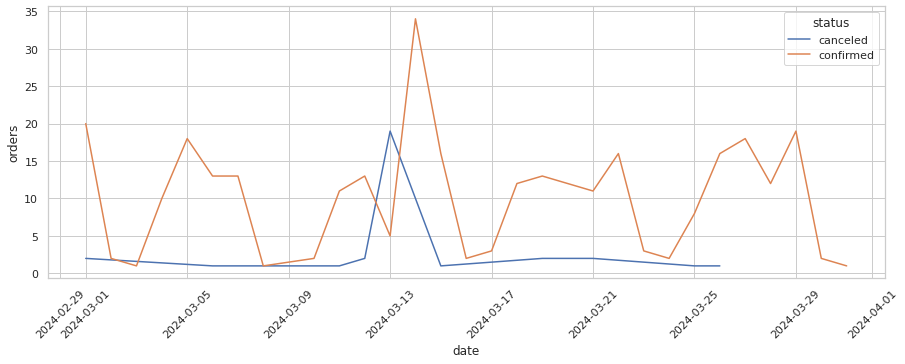

In [40]:
# Ваш код здесь

df_9 = df_df.reset_index()
sns.lineplot(data=df_9, x='date', y='orders', hue='status').tick_params(axis='x', rotation=45)
             #hue=df_fd.orders)
#.tick_params(axis='x', rotation=45)

## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите все отмененные заказы 13 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
2) Отберите все подтвержденные заказы 14 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
3) Объедините эти датафреймы с заказами по совпадающим характеристикам: имя менеджера, id клиента, число уникальных товаров в заказе и общее число товаров в штуках. Так у вас получатся те заказы, которые отменили в первый день и оформили заново на следующий.
      
4) Посчитайте число строк в датафрейме с заказами, которые отменили в первый день и оформили заново на следующий. Разделите это число на число строк в датафрейме с подтвержденными заказами 14 марта. Так вы узнаете долю заказов, которые повторяют вчерашние.
      
</p>
</details>

In [41]:
# Ваш код здесь

orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [42]:
#1) Отберите все отмененные заказы 13 марта и для каждого заказа агрегируйте данные: 
# посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, 
# а также возьмите менеджера и клиента (примените к соответствующим колонкам функции max).

In [43]:
df_13 = orders_status.loc[orders_status.date == '2024-03-13'].loc[orders_status.status == 'canceled'] \
.groupby('order_id').agg({'product_id':'count', 'quantity':'sum', 'manager':'max', 'client_id':'max'}) \
.rename(columns={'product_id':'unique_product_count'}).reset_index()
df_13.shape

(19, 5)

In [44]:
# 2) Отберите все подтвержденные заказы 14 марта и для каждого заказа агрегируйте данные: 
#     посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, 
#     а также возьмите менеджера и клиента (примените к соответствующим колонкам функции max).

In [45]:
df_14 = orders_status.loc[orders_status.date == '2024-03-14'].loc[orders_status.status == 'confirmed'] \
.groupby('order_id').agg({'product_id':'count', 'quantity':'sum', 'manager':'max', 'client_id':'max'}) \
.rename(columns={'product_id':'unique_product_count'}).reset_index()
df_14.shape

(34, 5)

In [46]:
# 3) Объедините эти датафреймы с заказами по совпадающим характеристикам: имя менеджера, id клиента, 
#     число уникальных товаров в заказе и общее число товаров в штуках. Так у вас получатся те заказы, 
#     которые отменили в первый день и оформили заново на следующий.

In [47]:
answer = pd.DataFrame()
answer = df_13.merge(df_14, how='inner', on=['manager', 'client_id', 'unique_product_count', 'quantity'])
answer.shape

(16, 6)

In [48]:
16/34

0.47058823529411764

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Откройте файл `usd_rate.txt` с помощью контекстного менеджера `with` и функции `open()`. Список строк сохраните в переменную `currency`.
      
2) С помощью функции `pd.DataFrame(columns=['col_name'])` создайте из списка датафрейм с любым названием единственной колонки.
      
3) На основе имеющейся колонки создайте колонки `date` и `currency_rate`, куда положите соответствующие данные. Для этого разделите общую строку со всеми данными и возьмите нужные данные по индексу.
      
4) Переведите колонку `date` в тип `datetime`.
      
5) Удалите из датафрейма ненужную колонку с общими данными.
      
6) Посчитайте среднее значение курса доллара за месяц.
      
7) Результат округлите до двух знаков после точки.   
      
</p>
</details>

In [49]:
# Ваш код здесь
currency = []
with open("usd_rate.txt", "r") as file:
    for line in file:
        currency.append(line)
#     print(currency)
currency

['2024-03-01,90.8423,Доллар США\n',
 '2024-03-02,91.3336,Доллар США\n',
 '2024-03-03,91.3336,Доллар США\n',
 '2024-03-04,91.3336,Доллар США\n',
 '2024-03-05,91.3534,Доллар США\n',
 '2024-03-06,91.1604,Доллар США\n',
 '2024-03-07,90.3412,Доллар США\n',
 '2024-03-08,90.7493,Доллар США\n',
 '2024-03-09,90.7493,Доллар США\n',
 '2024-03-10,90.7493,Доллар США\n',
 '2024-03-11,90.7493,Доллар США\n',
 '2024-03-12,90.6252,Доллар США\n',
 '2024-03-13,90.8818,Доллар США\n',
 '2024-03-14,91.5449,Доллар США\n',
 '2024-03-15,91.6359,Доллар США\n',
 '2024-03-16,91.87,Доллар США\n',
 '2024-03-17,91.87,Доллар США\n',
 '2024-03-18,91.87,Доллар США\n',
 '2024-03-19,91.9829,Доллар США\n',
 '2024-03-20,92.2243,Доллар США\n',
 '2024-03-21,92.6861,Доллар США\n',
 '2024-03-22,91.9499,Доллар США\n',
 '2024-03-23,92.6118,Доллар США\n',
 '2024-03-24,92.6118,Доллар США\n',
 '2024-03-25,92.6118,Доллар США\n',
 '2024-03-26,92.7761,Доллар США\n',
 '2024-03-27,92.5745,Доллар США\n',
 '2024-03-28,92.5919,Доллар США\n'

In [50]:
currency[0]

'2024-03-01,90.8423,Доллар США\n'

In [51]:
dollar_currency = pd.DataFrame(currency, columns=['col_name'])

dollar_currency

,col_name
0,"2024-03-01,90.8423,Доллар США\n"
1,"2024-03-02,91.3336,Доллар США\n"
2,"2024-03-03,91.3336,Доллар США\n"
3,"2024-03-04,91.3336,Доллар США\n"
4,"2024-03-05,91.3534,Доллар США\n"
5,"2024-03-06,91.1604,Доллар США\n"
6,"2024-03-07,90.3412,Доллар США\n"
7,"2024-03-08,90.7493,Доллар США\n"
8,"2024-03-09,90.7493,Доллар США\n"
9,"2024-03-10,90.7493,Доллар США\n"


In [52]:
dollar_currency['currency_rate'] = dollar_currency.col_name.str.split(',', expand=True)[1]
dollar_currency['date'] = dollar_currency.col_name.str.split(',', expand=True)[0]
dollar_currency = dollar_currency.drop(columns=['col_name'])

In [53]:
dollar_currency.date = pd.to_datetime(dollar_currency.date, yearfirst=True)
dollar_currency.currency_rate = dollar_currency.currency_rate.astype(float)
dollar_currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   currency_rate  31 non-null     float64       
 1   date           31 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


In [54]:
dollar_currency.currency_rate.mean().round(2)

91.7

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Присоедините к датафрейму `orders_status` датафрейм `df_products`, указав, что ключом в левом датафрейме будет являться колонка `product_id` (параметр `left_on`), а в правом — колонка `id` (параметр `right_on`). Новый датафрейм сохраните в `df_full`.
      
2) К датафрейму `df_full` добавьте информацию о курсе доллара на каждую дату, присоединив датафрейм `df_currency` по общей колонке с датой.
      
3) Создайте колонку `price_rub` с ценами в рублях. Для этого умножьте значения в колонке `price` с ценами на значения в колонке `currency_rate` с курсом валюты.
      
4) Создайте колонку `revenue` с выручкой, умножив колонку со стоимостью единицы товара в рублях на колонку с количеством товара.
      
5) Отберите только записи с подтвержденными заказами и сохраните результат в датафрейм `df_confirmed`, он вам ещё пригодится.
      
6) Суммируйте значения в колонке `revenue` и округлите результат до двух знаков после точки.
      
</p>
</details>

In [55]:
# Ваш код здесь

df_full = orders_status.merge(df_products, how='inner', left_on=['product_id'], right_on=['id'])
df_full = df_full.merge(dollar_currency, how='inner', on=['date'])
df_full['price_rub'] = df_full.price * df_full.currency_rate
df_full['revenue'] = df_full.price_rub * df_full.quantity

df_full.shape

(4603, 14)

In [56]:
df_confirmed = df_full.loc[df_full.status == 'confirmed']
df_confirmed.shape

(4083, 14)

In [57]:
df_confirmed.revenue.sum().round(2)

2038231821.56

## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Посчитайте число уникальных подтвержденных заказов.

2) Разделите сумму выручки, посчитанную на прошлом шаге (без округления), на это число.

3) Результат округлите до двух знаков после точки.  
      
</p>
</details>

In [58]:
# Ваш код здесь

df_confirmed.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04


In [59]:
df_confirmed.groupby('order_id').agg({'id':'count'}).shape[0]

309

In [60]:
(df_confirmed.revenue.sum() / df_confirmed.groupby('order_id').agg({'id':'count'}).shape[0]).round(2)

6596219.49

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сгруппируйте датафрейм `df_confirmed` с подтвержденными заказами по дате и посчитайте на каждую дату число ункальных заказов и выручку. Результат сохраните в датафрейм `df_report_by_date`. Получившуюся колонку с числом заказов можете переименовать в `orders`. 
      
2) Создайте колонку со значением среднего чека в каждую дату, для этого разделите значения в колонке с выручкой на значения в колонке с числом заказов. Результат округлите до двух знаков после точки
      
3) Постройте три линейных графика, один под другим (в одной ячейке или в разных)
      
</p>
</details>

In [61]:
# Ваш код здесь

df_report_by_date = df_confirmed.groupby('date').agg({'order_id':'nunique', 'revenue':'sum'}) \
.rename(columns={'order_id':'orders'}).reset_index()
df_report_by_date['avg_check'] = (df_report_by_date.revenue / df_report_by_date.orders).round(2)
df_report_by_date.head()

,date,orders,revenue,avg_check
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46


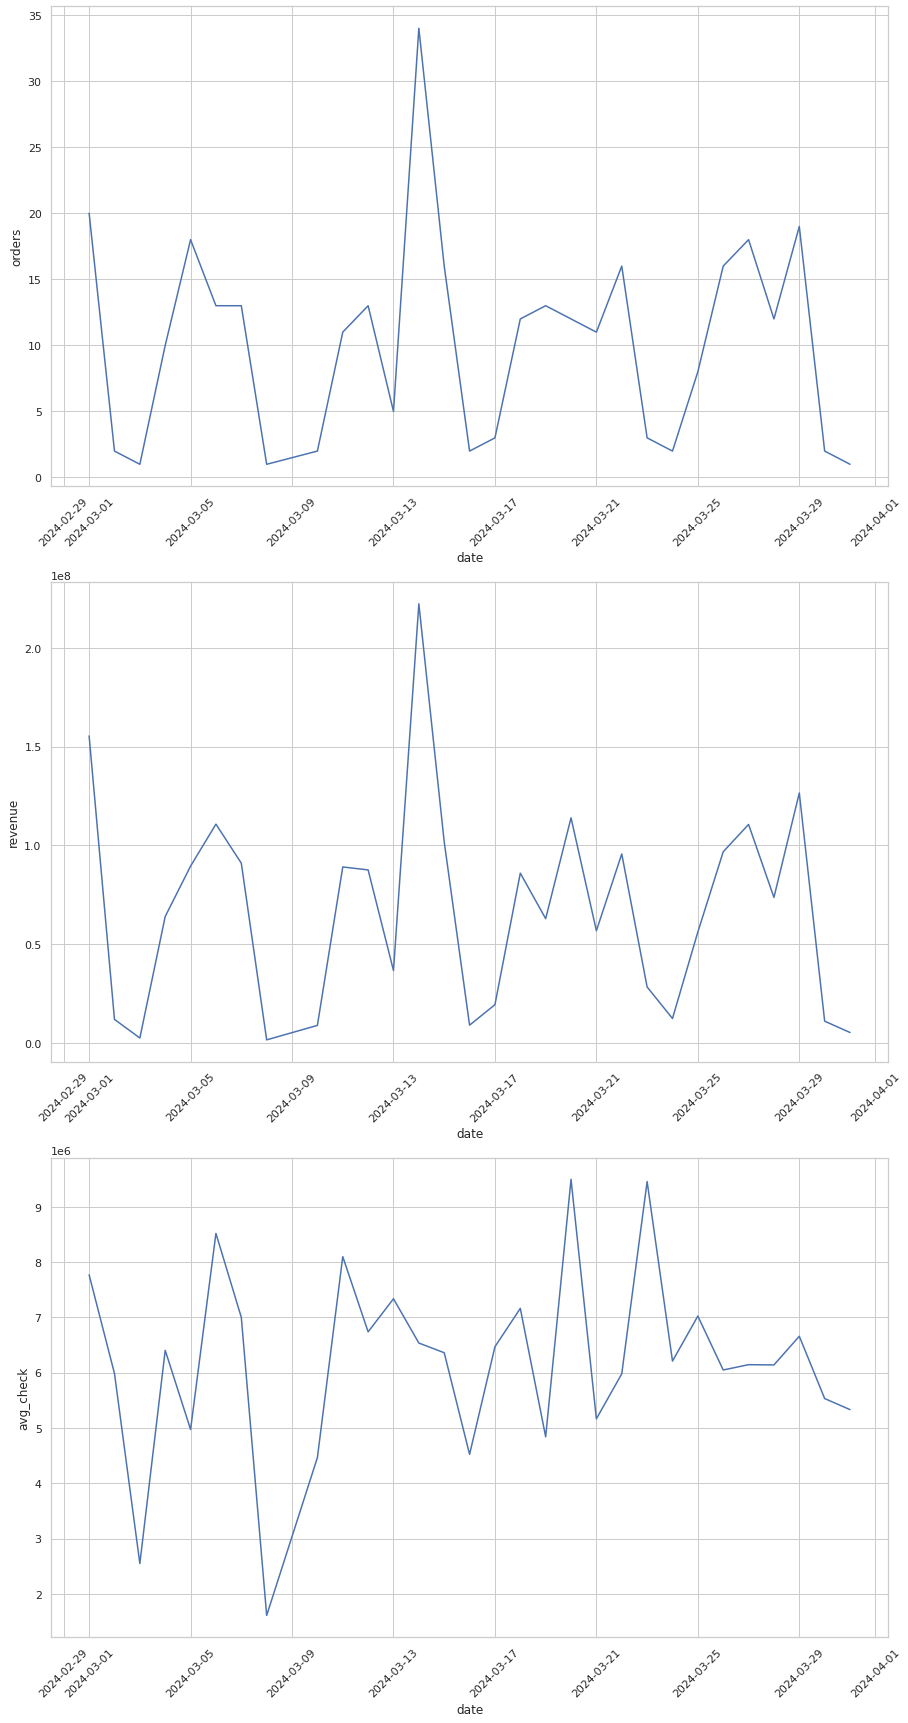

In [62]:
sns.set(
    font_scale =1,
    style      ="whitegrid",
    rc         ={'figure.figsize':(15,30)}
)
plt.subplot(3, 1, 1)
sns.lineplot(data=df_report_by_date, x='date', y='orders').tick_params(axis='x', rotation=45)

plt.subplot(3, 1, 2)
sns.lineplot(data=df_report_by_date, x='date', y='revenue').tick_params(axis='x', rotation=45)

plt.subplot(3, 1, 3)
sns.lineplot(data=df_report_by_date, x='date', y='avg_check').tick_params(axis='x', rotation=45)


In [63]:
# sns.lineplot(data=df_report_by_date, x='date', y='orders').tick_params(axis='x', rotation=45)

### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) В датафрейме `df_full` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке name и возьмите первое из них (сначала идет бренд и через запятую модель товара).

2) Посчитайте количество уникальных значений в колонке `brand`.
      
</p>
</details>

In [64]:
# Ваш код здесь

df_full['brand'] = df_full.name.str.split(',', expand=True)[0]
df_full.brand.nunique()

121

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите в датафрейме `df_full` только подтвержденные заказы.

2) Сгруппируйте данные по брендам и посчитайте выручку и количество уникальных заказов.

3) Отсортируйте агрегированные данные по убыванию выручки и посмотрите бренд в верхней строчке.

4) Дополнительно: отсортируйте агрегированные данные по убыванию количество заказов и посмотрите бренд в верхней строчке.

</p>
</details>

In [65]:
# Ваш код здесь

df_full.loc[df_full.status == 'confirmed'].groupby('brand').agg({'revenue':'sum', 'order_id':'nunique'}) \
.rename(columns={'order_id':'unique_orders'}).reset_index() \
.sort_values('revenue', ascending=False).head()

,brand,revenue,unique_orders
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
53,Klipsch,2.039024e+08,205
120,Yamaha,1.658651e+08,218
49,KEF,1.465101e+08,73


In [66]:
df_full.loc[df_full.status == 'confirmed'].groupby('brand').agg({'revenue':'sum', 'order_id':'nunique'}) \
.rename(columns={'order_id':'unique_orders'}).reset_index() \
.sort_values('unique_orders', ascending=False).head()

,brand,revenue,unique_orders
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
120,Yamaha,1.658651e+08,218
53,Klipsch,2.039024e+08,205
62,Magnat,1.141989e+08,154


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сохраните в список `products_in_orders` уникальные идентификаторы товаров из датафрейма `df_confirmed`.
      
2) Создайте в датафрейме `df_products` новую колонку `is_in_orders`, в которой будет значение `yes`, если значение из колонки `id` этого датафрейма есть в списке `products_in_orders`. Если его в этом списке нет - в новую колонку для этой строчки запишите значение `no`.
      
3) Посчитайте количество встречающихся значений `yes` и  `no` в колонке `is_in_orders`.
      
</p>
</details>

In [93]:
# Ваш код здесь
products_in_orders = []
products_in_orders.append(df_confirmed.product_id.unique().tolist())
products_in_orders = products_in_orders[0]
#products_in_orders

In [107]:
for product in df_products.id:
    if product in products_in_orders:
#         df_products['is_in_orders'] = 'yes'
        df_products.loc[df_products[df_products.id == product].index, 'is_in_orders'] = 'yes'
    else:
        df_products.loc[df_products[df_products.id == product].index, 'is_in_orders'] = 'no'
#         df_products['is_in_orders'] = 'no'

In [110]:
df_products.loc[df_products.is_in_orders == 'yes']

,id,name,price,category,is_in_orders
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes
...,...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники,yes
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники,yes
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники,yes
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники,yes


## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) В датафрейме `df_products` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке `name` и возьмите первое из них (сначала идет бренд и через запятую модель товара).
      
2) Сгруппируйте данные по бренду и колонке, в которой указано, есть товар в заказах, и посчитайте число уникальных товаров. Колонку с числом товаров можете переименовать в `products`.
      
3) Разверните сгруппированные данные так, чтобы получилась сводная таблица в которой в индексе названия брендов, в колонках - есть товар в заказах или нет (`yes` и `no`), в значениях - количество товаров.
      
4) Заполните пропуски нулями.
      
5) Сбросьте индекс, чтобы названия брендов стали колонкой.
      
6) Посчитайте общее число товаров для каждого бренда, сложив значения в колонках `yes` и `no`.
      
7) Для каждого бренда посчитайте долю ни разу не заказанных товаров от всех продаваемых товаров этого бренда.
      
8) Отберите только те бренды, где общее число товаров больше 15 и доля ни разу не заказанных товаров больше половины (0.5).
      
</p>
</details>

In [117]:
# Ваш код здесь

df_products['brand'] = df_products.name.str.split(',', expand=True)[0]
df_vrem = df_products.groupby(['brand', 'is_in_orders']).agg({'id':'nunique'}) \
.rename(columns={'id':'products'})

In [127]:
df_vrem_next = pd.pivot_table(df_vrem,
               index=["brand"],
               values=["products"],
               columns=["is_in_orders"])
df_vrem_next = df_vrem_next.fillna('0').reset_index()
df_vrem_next['total'] = df_vrem_next.products.yes.astype(int) + df_vrem_next.products.no.astype(int)
df_vrem_next['dolya_no'] = df_vrem_next.products.no.astype(int) / df_vrem_next.total
df_vrem_next.loc[(df_vrem_next.total > 15) & (df_vrem_next.dolya_no > 0.5)]


brand products     total  dolya_no
is_in_orders                no yes                
32               Dali       49  18    67  0.731343
60                KEF       54  28    82  0.658537
77            Marantz       19   3    22  0.863636
94            Pioneer       70  33   103  0.679612

### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) Сгруппируйте данные с подтвержденными заказами из датафрейма `df_confirmed` по менеджерам и посчитайте для каждого сумму выручки и количество заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Отсортируйте записи по убыванию выручки.
      
3) Посчитайте процент выручки, приходящейся на каждого менеджера: разделите его выручку на суммарную выручку всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.
      
4) Посчитайте процент заказов, приходящихся на каждого менеджера: разделите его число заказов на суммарное число заказов всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.   
      
5) Постройте два барплота (столбиковые диаграммы): со значениями % выручки и % заказов у каждого менеджера.
      
</p>
</details>

In [144]:
# Ваш код здесь

df_managers = df_confirmed.groupby('manager').agg({'revenue':'sum', 'order_id':'nunique'}) \
.rename(columns={'order_id':'orders'}) \
.reset_index().sort_values('revenue', ascending=False)
df_managers['per_revenue'] = (df_managers.revenue / df_managers.revenue.sum() * 100).round(2)
df_managers['per_order'] = (df_managers.orders / df_managers.orders.sum() * 100).round(2)
df_managers

,manager,revenue,orders,per_revenue,per_order
9,Маргарита Камертонова,3.473886e+08,48,17.04,15.53
4,Виктор Тромбонов,3.188999e+08,50,15.65,16.18
8,Максим Барабанов,2.401478e+08,40,11.78,12.94
5,Владимир Ударников,2.084865e+08,31,10.23,10.03
0,Алексей Саксофонов,1.953435e+08,27,9.58,8.74
7,Ксения Балалайкина,1.817621e+08,27,8.92,8.74
6,Екатерина Тарелкина,1.781576e+08,28,8.74,9.06
10,Надежда Гармошкина,1.347836e+08,21,6.61,6.80
1,Анастасия Дудкина,1.234504e+08,20,6.06,6.47
2,Антон Скрипкин,5.150268e+07,7,2.53,2.27


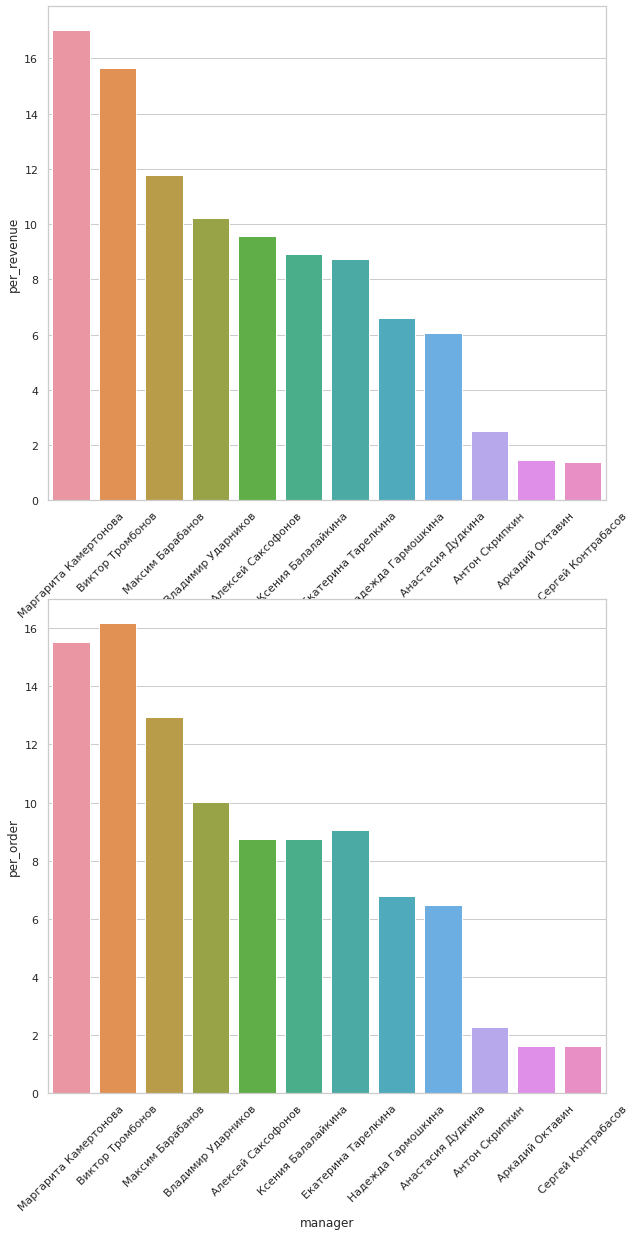

In [158]:
sns.set(
    font_scale =1,
    style      ="whitegrid",
    rc         ={'figure.figsize':(10,20)}
)
plt.subplot(2, 1, 1)
sns.barplot(data=df_managers, x='manager', y='per_revenue').tick_params(axis='x', rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(data=df_managers, x='manager', y='per_order').tick_params(axis='x', rotation=45)

## Итоги

В финальном проекте модуля Python вы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке». Вы проделали отличную работу!

Но если считаете, что можете больше, продолжайте анализ имеющихся данных самостоятельно. Например, посмотрите, в какие дни недели оформляется в среднем больше заказов; составьте более полный отчет по продажам каждого менеджера (учтите отмененные заказы); определите наиболее и наименее популярные/прибыльные категории товаров и т.п. Данные полны инсайтов! Но эти задания не оцениваются и по ним не осуществляется поддержка экспертов. Зато вы можете сделать эту работу своим пет-проектом :)